In [276]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import pandas as pd
import seaborn as sns
sns.set(
    style='ticks',
    context='paper',
    font_scale=1.5
)

red = sns.color_palette('Reds',255)[-1]
blue = sns.color_palette('Blues',255)[-1]

In [2]:
def show(m, cmap='viridis'):
    plt.matshow(m, cmap=cmap)
    plt.xticks([])
    plt.yticks([])

In [168]:
n = 10
d = 2
p = 0.2

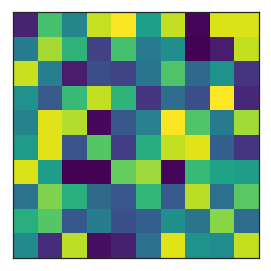

In [169]:
shape = (n,) * d
r = np.random.rand(*shape)
show(r)

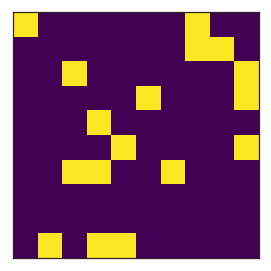

In [170]:
m = r < 0.2
show(m)

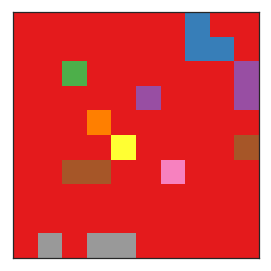

In [174]:
labels, k = ndimage.label(m)
show(labels, cmap='Set1')

In [172]:
biggest = max((labels==lbl).sum() for lbl in range(1, k))
biggest

3

In [173]:
def biggest_component(n, d, p):
    shape = (n,) * d
    m = np.random.rand(*shape)
    m = m < p
    m, k = ndimage.label(m)
    if k < 2:
        return 0
    return max((m == lbl).sum() for lbl in range(1, k)) / m.size

biggest_component(n, d, p)

0.050000000000000003

In [267]:
n = 30
d = 3
ps  = np.linspace(0.1, 0.5, 50)
nsamples = 10
biggest = [
    [
        biggest_component(n, d, p) 
        for _ in range(nsamples)
    ]
    for p in ps
]

In [268]:
df = pd.DataFrame(biggest)
df['p'] = ps
df = pd.melt(df, id_vars='p', var_name='sample', value_name='max size')
df.head()

,p,sample,max size
0,0.100000,0,0.000407
1,0.108163,0,0.000481
2,0.116327,0,0.000370
3,0.124490,0,0.000519
4,0.132653,0,0.000519


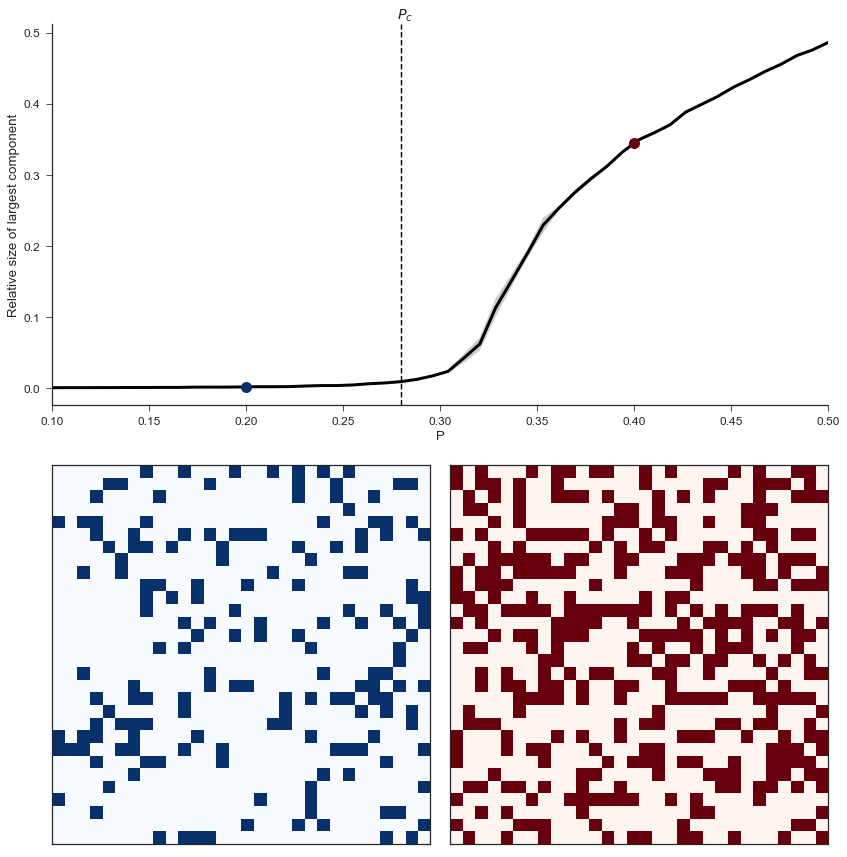

In [277]:
fig = plt.figure(figsize=(12, 12)) 
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2)

ax0 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, 1])
p1 = 0.2
p2 = 0.4

sns.tsplot(df, time='p', unit='sample', value='max size', color='k', lw=3, ax=ax0)
ax0.plot(p1, 0.001, 'o', color=blue, markersize=11)
ax0.plot(p2, 0.345, 'o', color=red, markersize=11)

ax0.axvline(0.28, color='k', ls='--')
ax0.text(0.278, 0.52, '$P_c$')
ax0.set(
    xlabel=('P'),
    ylabel=('Relative size of largest component')
)

shape = (n,) * d
m = np.random.rand(*shape)
m = m < p1
ax1.matshow(m[0], cmap=mpl.cm.Blues)
ax1.set(
    xticks=[], yticks=[]
)
m = np.random.rand(*shape)
m = m < p2
ax2.matshow(m[0], cmap=mpl.cm.Reds)
ax2.set(
    xticks=[], yticks=[]
)

fig.tight_layout() 
sns.despine(ax=ax0)